# Datetime Index with Pandas

In [2]:
from datetime import datetime
from matplotlib import dates

In [3]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13 #24 hour format
my_min = 30
my_sec = 15

In [4]:
my_date = datetime(my_year, my_month, my_day)

In [5]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [6]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [7]:
#Can look at a specific attribute
my_date_time.day

2

In [8]:
import numpy as np 

In [9]:
#looking at dates with numpy
np.array(['2020-03-15','2020-03-16','2020-03-17'], dtype = 'datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [10]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [11]:
#You can create ranges using numpys `arange()` function
np.arange('2018-06-01','2018-06-23', 7, dtype = 'datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [12]:
import pandas as pd 
pd.date_range('2020-01-01', periods = 7, freq = 'D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [13]:
#pandas is really good at inferring string codes as well
pd.date_range('Jan 01, 2018', periods = 7, freq = 'D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [15]:
#using format to look at Europian time -- day, month, year
pd.to_datetime(['1/2/2018','1/3/2018'], format= '%d/%m/%Y')

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [16]:
data = np.random.randn(3,2)
cols = ['A', 'B']
print(data)

[[-1.14605158  0.29391929]
 [-0.30553556  0.49224005]
 [-0.27526753 -1.56707398]]


In [17]:
idx = pd.date_range('2020-01-01',periods=3, freq = 'D')
df = pd.DataFrame(data, index = idx, columns = cols)
df

,A,B
2020-01-01,-1.146052,0.293919
2020-01-02,-0.305536,0.492240
2020-01-03,-0.275268,-1.567074


In [18]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [19]:
#Above you can see that these are datetime values

In [20]:
print(df.index.max())
print(df.index.argmax())

2020-01-03 00:00:00
2


## Time Resampling

In [21]:
df = pd.read_csv(r'C:\Users\chris\OneDrive\Personal Python Projects\UDEMY_TSA_FINAL\Data\starbucks.csv', index_col = 'Date', parse_dates= True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [22]:
#resample daily to yearly
df.resample(rule = 'A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [23]:
def first_day(entry): 
    #is there an entry? 
    if len(entry) != 0: 
        #if so return first entry
        return entry[0]

In [24]:
df.resample(rule = 'A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


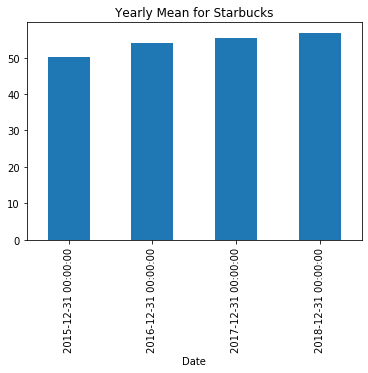

In [25]:
df['Close'].resample('A').mean().plot.bar(title = "Yearly Mean for Starbucks")

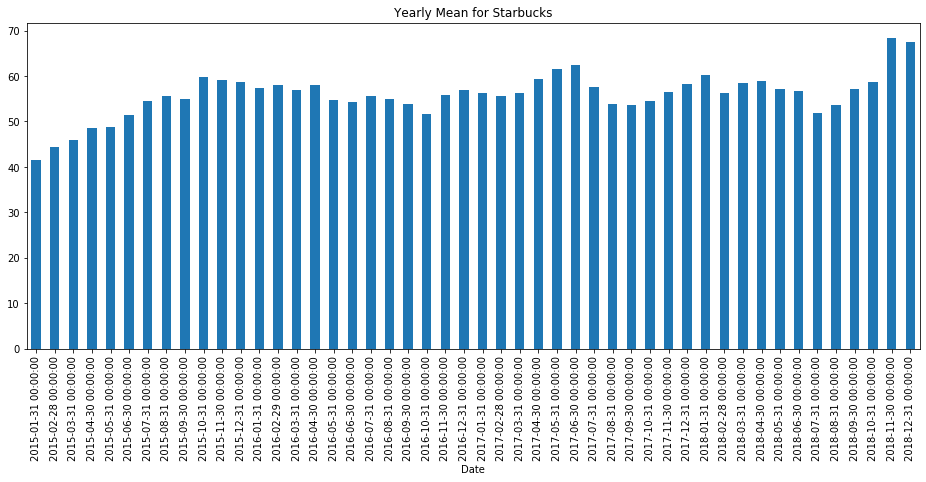

In [26]:
df['Close'].resample('M').max().plot.bar(figsize = (16,6), title = "Yearly Mean for Starbucks")

## Time Shifting

In [27]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [28]:
# When we shift, we lose the last rows
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [29]:
# OR you can shift backwards
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [30]:
df.shift(periods = 1, freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


## Rolling and Expanding

In [31]:
df = pd.read_csv(r'C:\Users\chris\OneDrive\Personal Python Projects\UDEMY_TSA_FINAL\Data\starbucks.csv', index_col = 'Date', parse_dates= True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


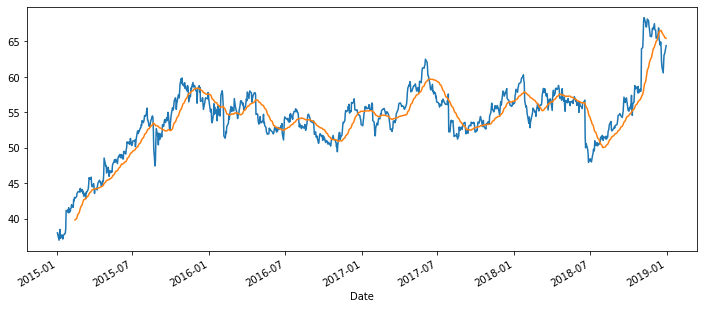

In [32]:
#window is based off the units in your dataset
df['Close'].plot(figsize = (12,5))
df.rolling(window = 30).mean()['Close'].plot()

In [33]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window = 30).mean()
df


,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
...,...,...,...
2018-12-24,60.5600,6323252,65.963703
2018-12-26,63.0800,16646238,65.791913
2018-12-27,63.2000,11308081,65.647000


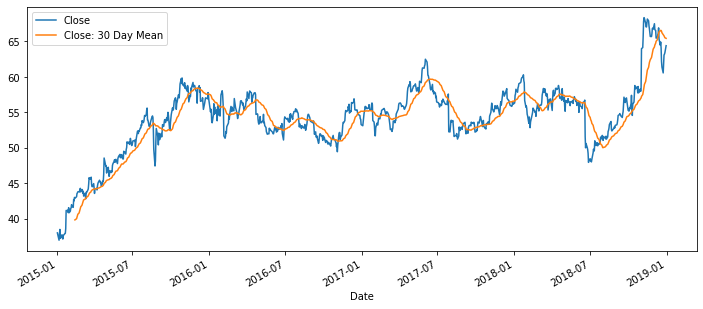

In [34]:
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12,5))

## Expanding 

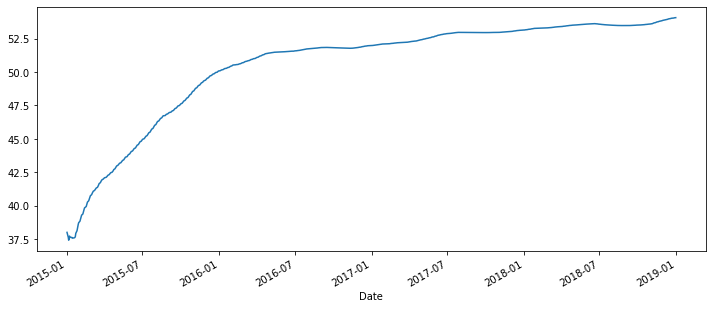

In [35]:
# This is essentially a moving aggregate since the beginning
df['Close'].expanding().mean().plot(figsize = (12,5))

## Visualizing Time Series Data

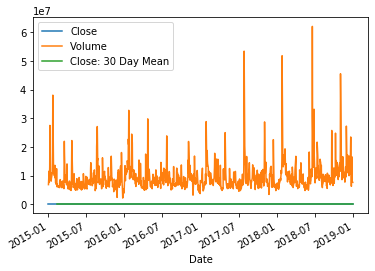

In [36]:
df.plot()

[Text(0, 0.5, 'Y Label'), Text(0.5, 0, 'X Label')]

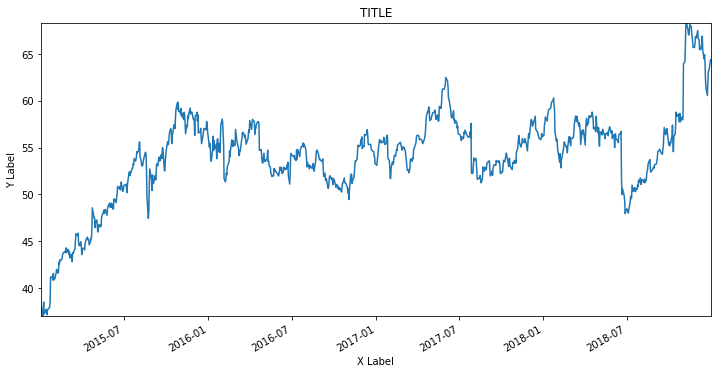

In [37]:
ax = df['Close'].plot(figsize = (12,6) , title = "TITLE")
ax.autoscale(axis = 'both', tight = True)
ax.set(ylabel = "Y Label", xlabel = "X Label")

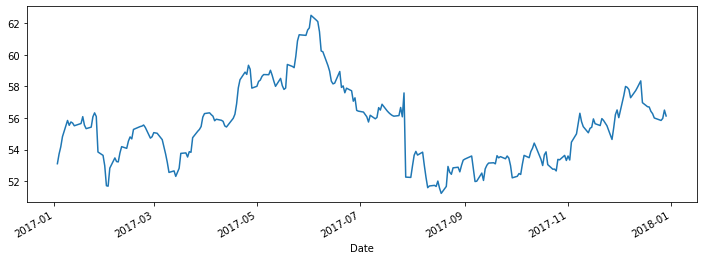

In [38]:
#Option 1 for editing X axis
df['Close']['2017-01-01':'2017-12-31'].plot(figsize = (12,4))

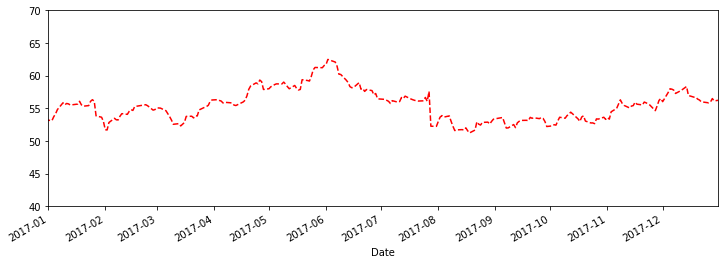

In [39]:
#option 2
df['Close'].plot(figsize=(12,4), xlim = ['2017-01-01','2017-12-31'], ylim = [40,70], ls = '--', c = 'red')

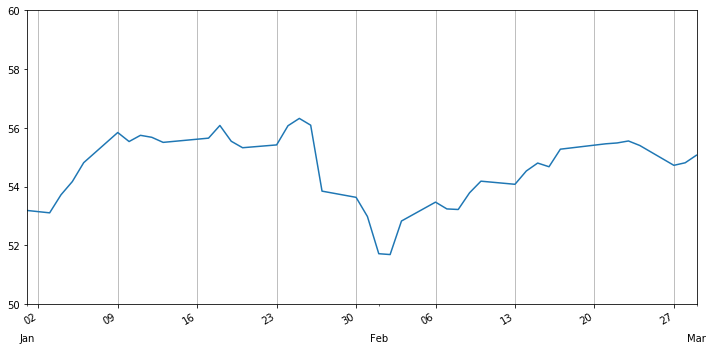

In [40]:
#adjusting x-ticks so that it uses weekday locators 0 instead of first of month
ax = df['Close'].plot(xlim = ['2017-01-01','2017-03-01'], ylim = [50,60], figsize = (12,6))
ax.set(xlabel = '')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0))
#you can adjust how th emonths look too
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

#building a sub-axis
ax.xaxis.set_minor_locator(dates.MonthLocator())
#you can use 
#\n\n to put sub on new lines
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.xaxis.grid(True)

In [41]:
np.linspace(1,20)

array([ 1.        ,  1.3877551 ,  1.7755102 ,  2.16326531,  2.55102041,
        2.93877551,  3.32653061,  3.71428571,  4.10204082,  4.48979592,
        4.87755102,  5.26530612,  5.65306122,  6.04081633,  6.42857143,
        6.81632653,  7.20408163,  7.59183673,  7.97959184,  8.36734694,
        8.75510204,  9.14285714,  9.53061224,  9.91836735, 10.30612245,
       10.69387755, 11.08163265, 11.46938776, 11.85714286, 12.24489796,
       12.63265306, 13.02040816, 13.40816327, 13.79591837, 14.18367347,
       14.57142857, 14.95918367, 15.34693878, 15.73469388, 16.12244898,
       16.51020408, 16.89795918, 17.28571429, 17.67346939, 18.06122449,
       18.44897959, 18.83673469, 19.2244898 , 19.6122449 , 20.        ])

## Time Series Analysis with Statsmodels

In [42]:
#when using the hodrick prescott method for lambda we use 1600 for quarterly, 6.25 for yearly, 129,600 for monthly
df = pd.read_csv(r'C:\Users\chris\OneDrive\Personal Python Projects\UDEMY_TSA_FINAL\Data\macrodata.csv', index_col = 0, parse_dates= True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


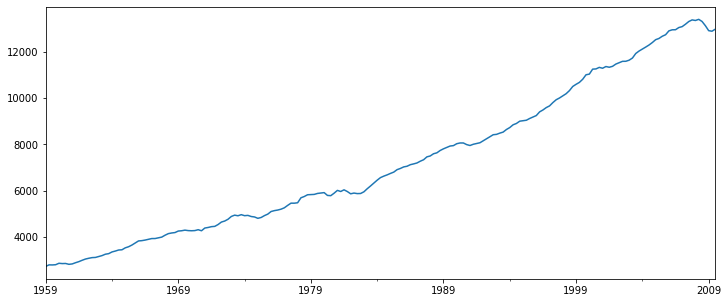

In [43]:
df['realgdp'].plot(figsize = (12,5))

In [44]:
#import hodrick prescott filter
from statsmodels.tsa.filters.hp_filter import hpfilter

In [45]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb = 1600)

In [46]:
type(gdp_trend)

pandas.core.series.Series

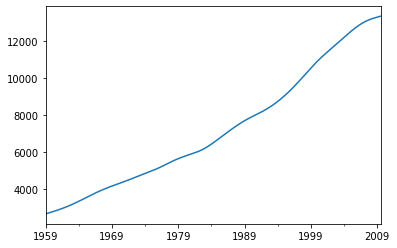

In [47]:
gdp_trend.plot()

In [48]:
df['gdp_trend'] = gdp_trend
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdp_trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


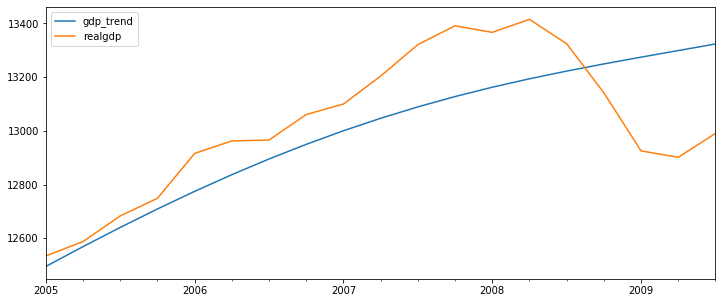

In [49]:
df[['gdp_trend', 'realgdp']]['2005-01-01':].plot(figsize = (12,5))

## ETS Models - Error, Trend, Seasonality (ETS Decomposition)

We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (every year we add 10K passengers)

We apply a multiplicative model is appropriate when we are increasing or decreasing at a non-linear rate (exponential)

In [50]:
airline = pd.read_csv(r'C:\Users\chris\OneDrive\Personal Python Projects\UDEMY_TSA_FINAL\Data\airline_passengers.csv', index_col = 'Month', parse_dates= True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [51]:
#can't have any missing data in ETS decomposition
airline.dropna(inplace= True)

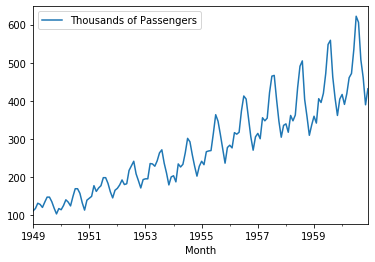

In [52]:
airline.plot()

In [53]:
#looks to be increasing at more than a linear rate
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(airline['Thousands of Passengers'], model= 'multiplicative')

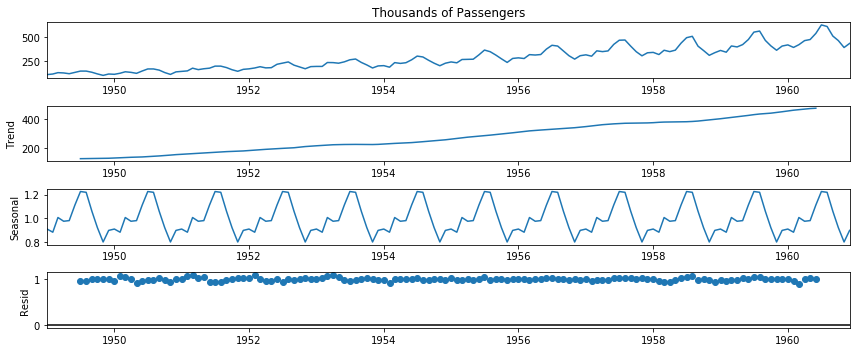

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
results.plot();

## Exponentially Weighted Moving Average Models

In [55]:
#dont think of this as a forecasting method
#more recent data is weighted more heavily than older data
airline = pd.read_csv(r'C:\Users\chris\OneDrive\Personal Python Projects\UDEMY_TSA_FINAL\Data\airline_passengers.csv', index_col = 'Month')
airline

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [56]:
airline.dropna(inplace = True)

In [57]:
airline.index = pd.to_datetime(airline.index)

In [58]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [59]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

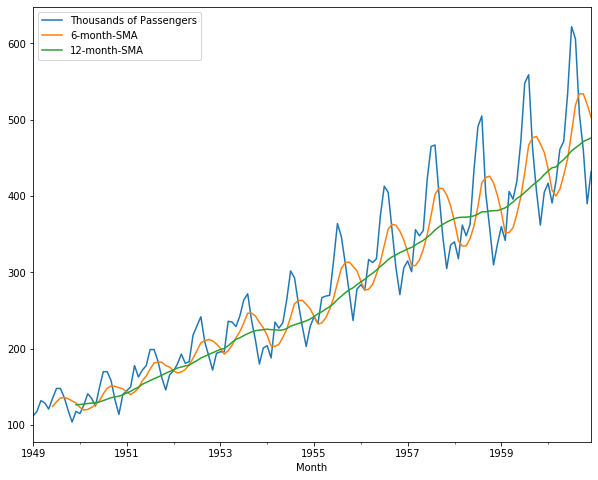

In [60]:
#This is a simple moving average
airline.plot(figsize = (10,8))

In [61]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span = 12).mean()

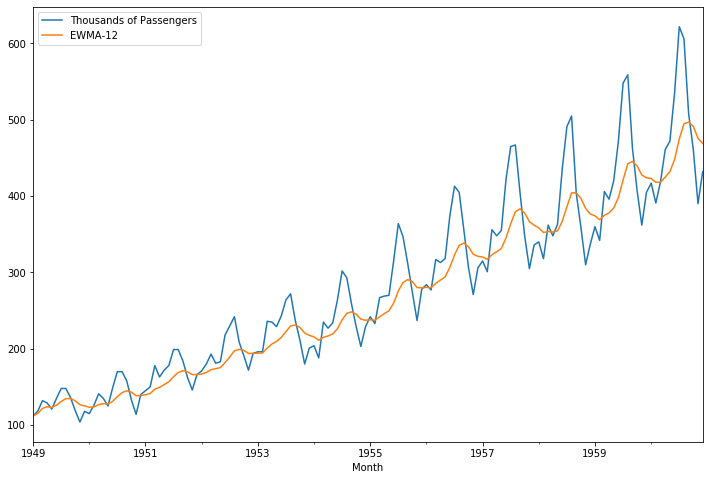

In [62]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize = (12,8))

* span corresponds to a n-day exponentially weighted moving average
* center of mass has a more physical representation
* half life is a period of time for the exponential weight to reduce to one half
* alpha specifies the smoothing factor directly

## Holt - Winters Methods

Holt method is double exponential smoothing. It introduces a new smoothing factor called B (beta) that addresses the trend component. 
Winters portion is a triple exponential smoothing that adds gamma which is the seasonal component. 
m = # of periods in a cycle

In [63]:
airline = pd.read_csv(r'C:\Users\chris\OneDrive\Personal Python Projects\Python-for-Time-Series-Data-Analysis\Data\airline_passengers.csv', index_col= 'Month', parse_dates= True)

In [64]:
airline.dropna(inplace=True)

In [65]:
#We need to understand the frequency of the data
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [66]:
# see above how it says that the freq = 'None'? we can fix
airline.index.freq = 'MS'
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [67]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [68]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [69]:
span = 12
alpha = 2/(span + 1)

In [70]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha = alpha, adjust = False).mean()

In [71]:
airline.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [72]:
# we can do this in one line with simple exponential smoothing
model = SimpleExpSmoothing(airline['Thousands of Passengers'])

In [73]:
fitted_model = model.fit(smoothing_level= alpha, optimized = False)

In [74]:
airline['SES12'] = fitted_model.fittedvalues.shift(-1)
#could to the above all in one line
airline.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


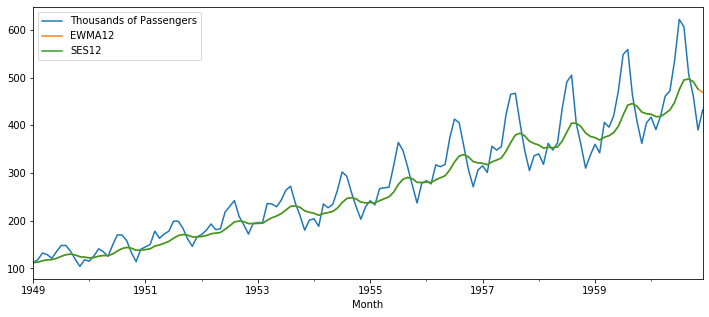

In [75]:
airline.plot()

In [76]:
#we'll do double exponenetial smoothing now
from statsmodels.tsa.holtwinters import ExponentialSmoothing
airline['DES_add_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'add').fit().fittedvalues.shift(-1)

C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [77]:
airline

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237773
1949-02-01,118,112.923077,112.923077,120.237773
1949-03-01,132,115.857988,115.857988,134.237773
1949-04-01,129,117.879836,117.879836,131.237773
1949-05-01,121,118.359861,118.359861,123.237773
...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.237773
1960-09-01,508,496.914216,496.914216,510.237773
1960-10-01,461,491.388952,491.388952,463.237773


In [78]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

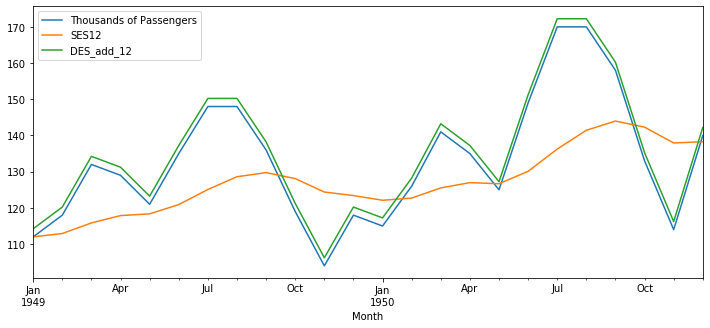

In [79]:
airline[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize = (12,5))

In [80]:
airline['DES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'mul').fit().fittedvalues.shift(-1)

C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


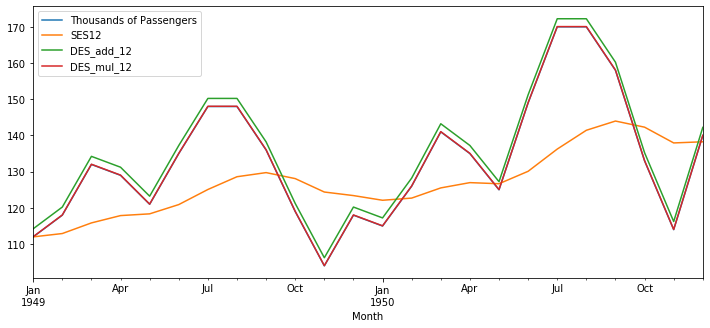

In [81]:
airline[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize = (12,5))
#multiplicative model actually fits the data better

In [82]:
airline['TES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [83]:
airline.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.237773,112.049247,111.583236
1949-02-01,118,112.923077,112.923077,120.237773,118.051885,118.839294
1949-03-01,132,115.857988,115.857988,134.237773,132.058041,133.327416
1949-04-01,129,117.879836,117.879836,131.237773,129.056722,127.915388
1949-05-01,121,118.359861,118.359861,123.237773,121.053204,120.978320


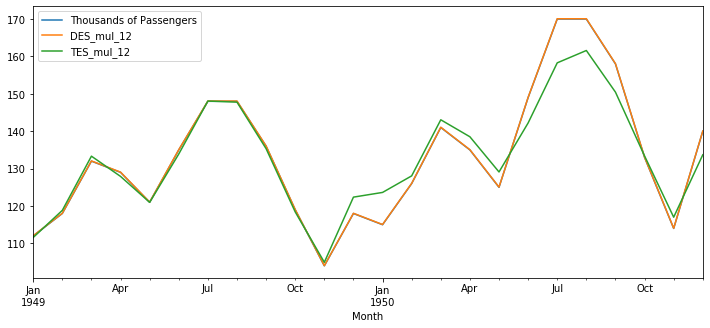

In [84]:
airline[['Thousands of Passengers', 'DES_mul_12','TES_mul_12']].iloc[:24].plot(figsize = (12,5))
#from the beginning of the plot... it looks like 3x exponential smoothing is not doing as good a job

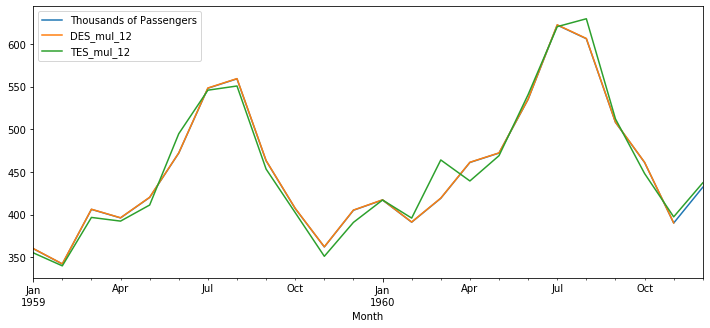

In [85]:
#what you need tho is to be able to forecast into the future and 3x exponential smoothing will do a better job over time
airline[['Thousands of Passengers', 'DES_mul_12','TES_mul_12']].iloc[-24:].plot(figsize = (12,5))

## General Forecasting Methods

In [86]:
df = pd.read_csv(r'C:\Users\chris\OneDrive\Personal Python Projects\UDEMY_TSA_FINAL\Data\airline_passengers.csv', index_col = 'Month', parse_dates= True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [87]:
df.index.freq = 'MS'

In [89]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [90]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [91]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [92]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()

C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [93]:
test_predictions = fitted_model.forecast(36)

In [94]:
test_predictions

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
1958-07-01    521.801193
1958-08-01    514.525372
1958-09-01    446.222776
1958-10-01    385.432121
1958-11-01    339.645926
1958-12-01    381.452236
1959-01-01    401.211186
1959-02-01    387.157129
1959-03-01    455.808535
1959-04-01    450.043490
1959-05-01    459.534631
1959-06-01    540.121064
1959-07-01    595.679687
1959-08-01    587.373728
1959-09-01    509.400604
1959-10-01    440.002990
1959-11-01    387.734221
1959-12-01    435.459618
1960-01-01    458.016112
1960-02-01    441.972230
1960-03-01    520.343550
1960-04-01    513.762270
1960-05-01    524.597200
1960-06-01    616.593351
1960-07-01    680.018164
1960-08-01    670.536218
1960-09-01    581.523378
1960-10-01    502.300199
1960-11-01    442.631029
1960-12-01    497.113561
1961-01-01    522.863684
Freq: MS, dtype: float64

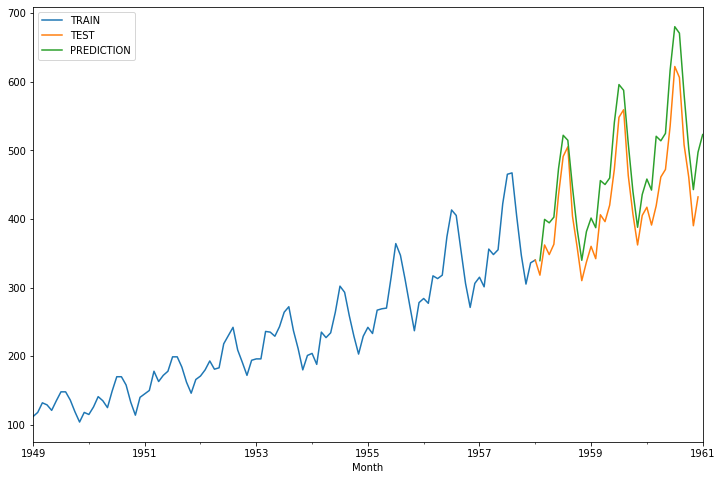

In [98]:
train_data['Thousands of Passengers'].plot(legend=True, label = 'TRAIN', figsize = (12,8))
test_data['Thousands of Passengers'].plot(legend=True, label = 'TEST', figsize = (12,8))
test_predictions.plot(legend=True, label = 'PREDICTION', figsize = (12,8))